# 用户指南，第14章：节拍
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_14_timeSignatures.html)

到目前为止，我们几乎一直在处理 4/4 拍的音乐。这并不是因为我们非常喜欢 4/4 拍，而仅仅是因为，正如我们在第 4 章中提到的，没有指定拍号的 music21 `Stream` 对象默认使用 4/4 拍。

通常，节拍`TimeSignature`对象位于`Measure`对象内部。然而，在某些情况下，`TimeSignature`对象可以直接位于`Stream`上。

`TimeSignature`对象作为`Music21Object`的子类，具有时刻`offset`，可以放置在`Stream`上的任何位置。当放置在小节中时，`TimeSignature`通常放置在开始处。可以通过`measure.timeSignature`来设置或获取小节开始处的节拍对象。如果小节没有节拍对象，则`timeSignature`属性返回 None。

与节拍相关的对象和函数位于`music21.meter`模块。输入`from music21 import *`导入该模块。该模块提供很多功能，但我们这里最关心的是`TimeSignature`对象。我们先创建一些音符和一个`TimeSignature`对象。

In [1]:
from music21 import *

noteC = note.Note('C4', type='half')
noteD = note.Note('D4', type='quarter')
noteE = note.Note('E4', type='quarter')
noteF = note.Note('F4', type='half')

tsThreeFour = meter.TimeSignature('3/4')

print(tsThreeFour.numerator, '/',  tsThreeFour.denominator)

3 / 4


可以用`.ratioString`将节拍直接转换为字符串：

In [2]:
tsThreeFour.ratioString

'3/4'

创建一个流，将这些音符和拍号添加进去：

In [3]:
stream1 = stream.Stream()

for thisThing in [tsThreeFour, noteC, noteD, noteE, noteF]:
    stream1.append(thisThing)

用`.show('text')`来查看：

In [4]:
stream1.show('text')

{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C>
{2.0} <music21.note.Note D>
{3.0} <music21.note.Note E>
{4.0} <music21.note.Note F>


拍号和第一个音符在 Stream 中的位置都是 offset 0.0 开始，这是因为默认情况下，TimeSignature 对象没有长度：

In [5]:
tsThreeFour.duration.quarterLength

0.0

显示为五线谱，可以看到这两个小节都是 3/4 拍

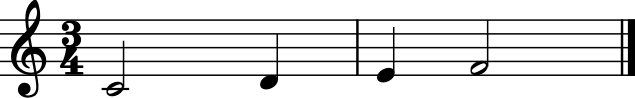

In [6]:
stream1.show()

music21 在将一个流显示为五线谱时，内部会事先将其分割成小节，这便是基于拍号`TimeSignature`。我们也可以对这个流使用`makeMeasures()`函数，直接看到这个过程：

In [7]:
stream2 = stream1.makeMeasures()
stream2.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note D>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.note.Note E>
    {1.0} <music21.note.Note F>
    {3.0} <music21.bar.Barline type=final>


顺便说一句，`makeMeasures`命令还会在 Stream 中放入一个 TrebleClef，并将最后一个小节线设置为终止线`final`，这使其在 Lilypond 中的输出看起来稍微漂亮一点（文档中使用的就是这种方式；如果你跟着做，很可能使用的是 MusicXML ，它处理得是正确的……）
> 译注：译文在译者的电脑上重新运行，其中五线谱使用 Musescore 生成。

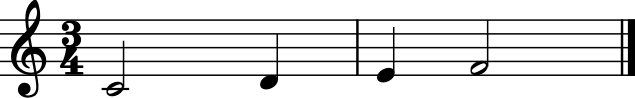

In [8]:
stream2.show()

拍号有一个`.symbol`属性，可以用于更改某些常见拍号的显示方式：

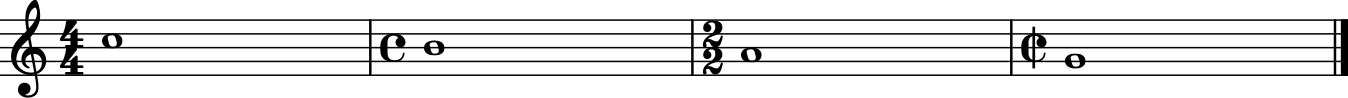

In [9]:
s = stream.Stream()
ts0 = meter.TimeSignature('4/4')
ts1 = meter.TimeSignature('4/4')
ts1.symbol = 'common'
ts2 = meter.TimeSignature('2/2')
ts3 = meter.TimeSignature('2/2')
ts3.symbol = 'cut'
s.append(ts0)
s.append(note.Note('C5', type='whole'))
s.append(ts1)
s.append(note.Note('B4', type='whole'))
s.append(ts2)
s.append(note.Note('A4', type='whole'))
s.append(ts3)
s.append(note.Note('G4', type='whole'))
s.makeMeasures(inPlace=True)
s.show()

## 拍位
> 译注：这里的“拍位”是我引入的术语，指一个时刻位于第几个拍子，表示时刻，以与表示时间的“拍”区分。
除了用于显示外，`TimeSignature`对象还让我们能够确定每个`Note`（或`Rest`、`Chord`等）的拍位`beat`。让我们回到前面没划分小节的`Stream`，并查看每个音符的拍位：

In [10]:
stream1.notes[0]

<music21.note.Note C>

In [11]:
stream1.notes[0].beat

1.0

好的，第一拍的第一个音符在拍位 1.0 处。这与它的 offset (0.0) 不同。请记住，偏移量是从对象所属的 Stream 的开头算起的四分音符数量。另一方面， beat 使用的是音乐家更熟悉的表示法（译注：从1开始，不同于python中常见的从0开始）。让我们看看 Stream 中所有音符的拍位：

In [12]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 3.0
<music21.note.Note E> 1.0
<music21.note.Note F> 2.0


如果我们只想找到落在第1拍上的音符，可以这样进行过滤：

In [13]:
for n in stream1.notes:
    if n.beat == 1.0:
        print(n)

<music21.note.Note C>
<music21.note.Note E>


在另一个拍号下会怎样？我们可以通过改变`Stream`中的`TimeSignature`对象来找出答案：

In [14]:
tsThreeFour.ratioString

'3/4'

In [15]:
tsThreeFour.ratioString = '2/4'

现在 TimeSignature 对象的变量名意义不大，但我们发现第一个、第二个和第四个音符都落在第1拍上。

In [16]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 1.0
<music21.note.Note E> 2.0
<music21.note.Note F> 1.0


我们再将拍号改为 6/8，则相同的音符将位于与最开始的 3/4 流中的强拍相同的位置，但它们的拍位会不同。这次我们将使用`numerator`（分子）和`denominator`（分母）来改变节拍。请记住，所有这些不同的技巧都在`music21.meter.TimeSignature`源代码中进行了全面的文档说明。

In [17]:
tsThreeFour.numerator = 6
tsThreeFour.denominator = 8
tsThreeFour

<music21.meter.TimeSignature 6/8>

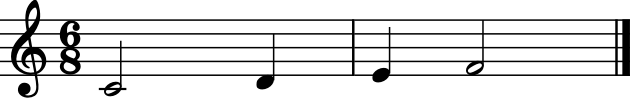

In [18]:
stream1.show()

In [19]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 7/3
<music21.note.Note E> 1.0
<music21.note.Note F> 5/3


除了`.beat`之外，还有一个`.beatStr`，它返回一个带分数字符串，可能对音乐家来说看起来更正常。

In [20]:
for n in stream1.notes:
    print(n, n.beatStr)

<music21.note.Note C> 1
<music21.note.Note D> 2 1/3
<music21.note.Note E> 1
<music21.note.Note F> 1 2/3


请注意，默认情况下创建的6/8是“快”的6/8，即每小节有两拍而不是六拍。我们可以通过`TimeSignature.beatCount`来查看每小节有多少个节拍。

In [21]:
tsThreeFour.beatCount

2

也可以改变它，看看它如何影响结果：

In [22]:
tsThreeFour.beatCount = 6

for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 5.0
<music21.note.Note E> 1.0
<music21.note.Note F> 3.0


也可以直接在创建时用`fast 6/8`和`slow 6/8`指定。

In [23]:
tsFast68 = meter.TimeSignature('fast 6/8')
tsSlow68 = meter.TimeSignature('slow 6/8')

tsFast68.beatCount, tsSlow68.beatCount

(2, 6)

## 在乐谱中处理拍号
在上文中，我们一直在处理单个流中的拍号。然而，通常情况下，拍号位于音轨内部的小节中。这里，我们从乐谱库中打开一首巴赫写的众赞歌。

In [24]:
myBach = corpus.parse('bach/bwv57.8')

print(myBach.__class__)

<class 'music21.stream.base.Score'>


从`Score.parts`获取`Alto`音轨：

In [25]:
alto = myBach.parts['Alto']

alto

<music21.stream.Part Alto>

使用`.show()`显示为五线谱。可以看到这是巴赫仅有的几首 3/4 拍众赞歌之一：

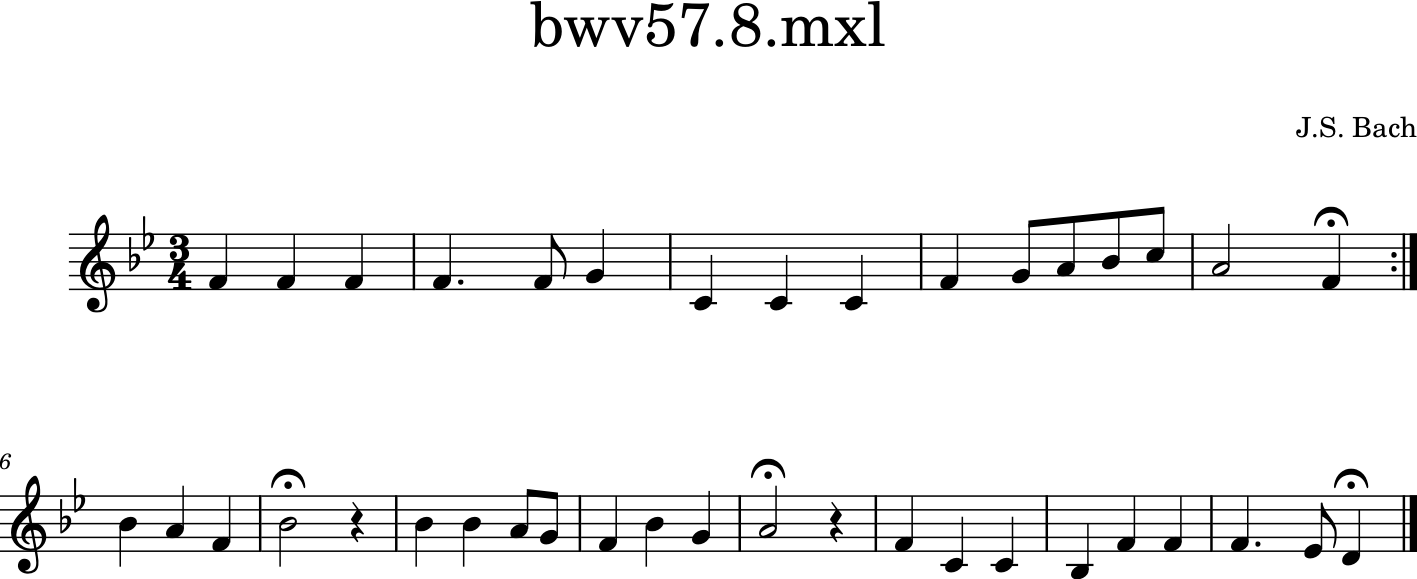

In [26]:
alto.show()

要检查音轨中的`TimeSignature`对象，有几种方法。一种方法是直接在音轨中的所有对象中查找，或先展平再查找。请记住，音轨通常由小节或嵌入流中的容器组成。要获取流中的所有元素，我们可以先使用`flatten`属性，然后使用`getElementsByClass()`方法搜索该类。这将返回一个包含所有基于该类的元素的新流。此流中的第一个元素是拍号。

In [27]:
alto.recurse().getElementsByClass(meter.TimeSignature)[0]

<music21.meter.TimeSignature 3/4>

In [28]:
len(alto.recurse().getElementsByClass(meter.TimeSignature))

1

我们看到在这个音轨中恰好有一个拍号。

另外，我们可以查看音轨中的第一小节，并检查`timeSignature`属性。

In [29]:
alto.measure(1).timeSignature

<music21.meter.TimeSignature 3/4>

其他小节没有 TimeSignature 对象：

In [30]:
alto.measure(7).timeSignature is None

True

接下来将拍号改为 6/8 ：

In [31]:
alto.measure(7).timeSignature = meter.TimeSignature('6/8')

根据新的拍号重新生成符杆：

In [32]:
alto.makeBeams(inPlace=True)

清除所有符尾的方向指示，以免出现非常混乱的连线，然后显示新的乐谱。

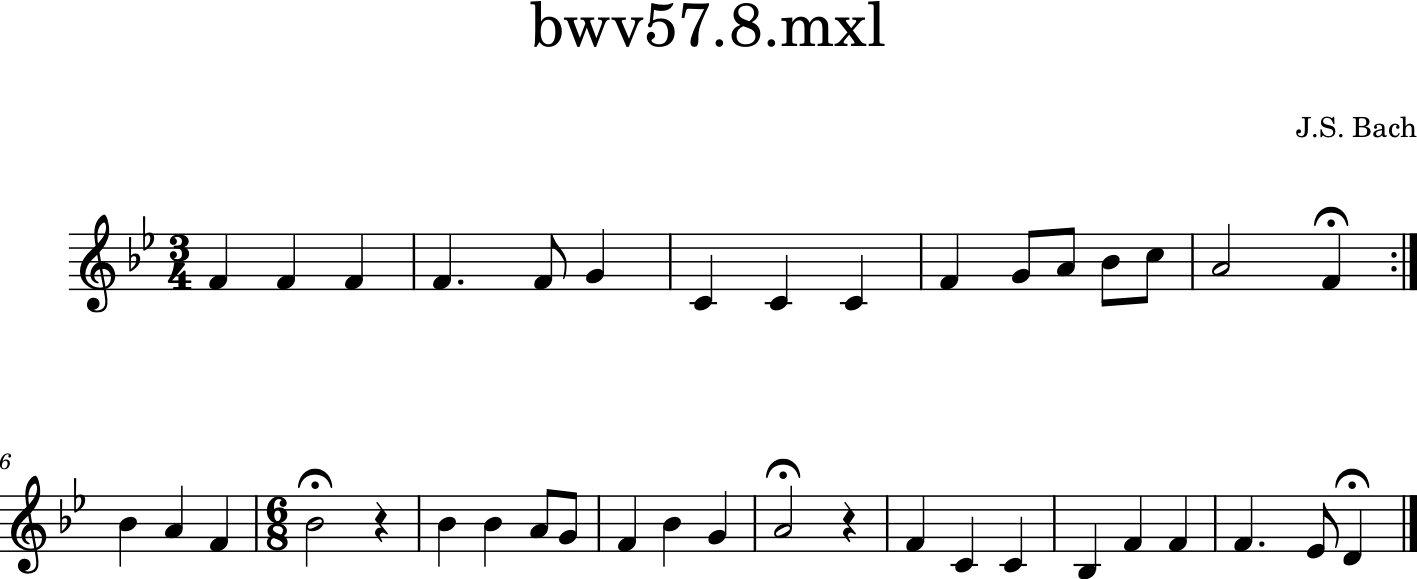

In [33]:
for n in alto.recurse().notes:
    n.stemDirection = 'unspecified'

alto.show()

尽管改了拍号，但现在还没有反映在小节上。让我们重新编排一切。首先，展平`Alto`音轨，然后获取所有不是拍号的内容。使用`getElementsNotOfClass()`获取不基于某个类的元素，它既支持输入python类，也支持输入字符串“TimeSignature”。

In [34]:
newAlto = alto.flatten().getElementsNotOfClass([meter.TimeSignature,
                                                layout.LayoutBase]
                                              ).stream()
newAlto.insert(0, meter.TimeSignature('2/4'))

此时如果划分小节，我们会发现第 2 小节到第 3 小节之间存在问题。

In [35]:
newAlto.makeMeasures(inPlace=True)
newAlto.measures(1, 4).show('text', addEndTimes=True)

{0.0 - 2.0} <music21.stream.Measure 1 offset=0.0>
    {0.0 - 0.0} <music21.instrument.Instrument 'P2: Alto: '>
    {0.0 - 0.0} <music21.clef.TrebleClef>
    {0.0 - 0.0} <music21.key.Key of B- major>
    {0.0 - 0.0} <music21.meter.TimeSignature 2/4>
    {0.0 - 1.0} <music21.note.Note F>
    {1.0 - 2.0} <music21.note.Note F>
{2.0 - 4.5} <music21.stream.Measure 2 offset=2.0>
    {0.0 - 1.0} <music21.note.Note F>
    {1.0 - 2.5} <music21.note.Note F>
{4.0 - 6.0} <music21.stream.Measure 3 offset=4.0>
    {0.5 - 1.0} <music21.note.Note F>
    {1.0 - 2.0} <music21.note.Note G>
{6.0 - 8.0} <music21.stream.Measure 4 offset=6.0>
    {0.0 - 1.0} <music21.note.Note C>
    {1.0 - 2.0} <music21.note.Note C>


第 2 小节最后一个 F 过长，第 3 小节的第一个 F 晚了半拍才开始。先运行强大的命令`makeNotation()`，然后再显示：

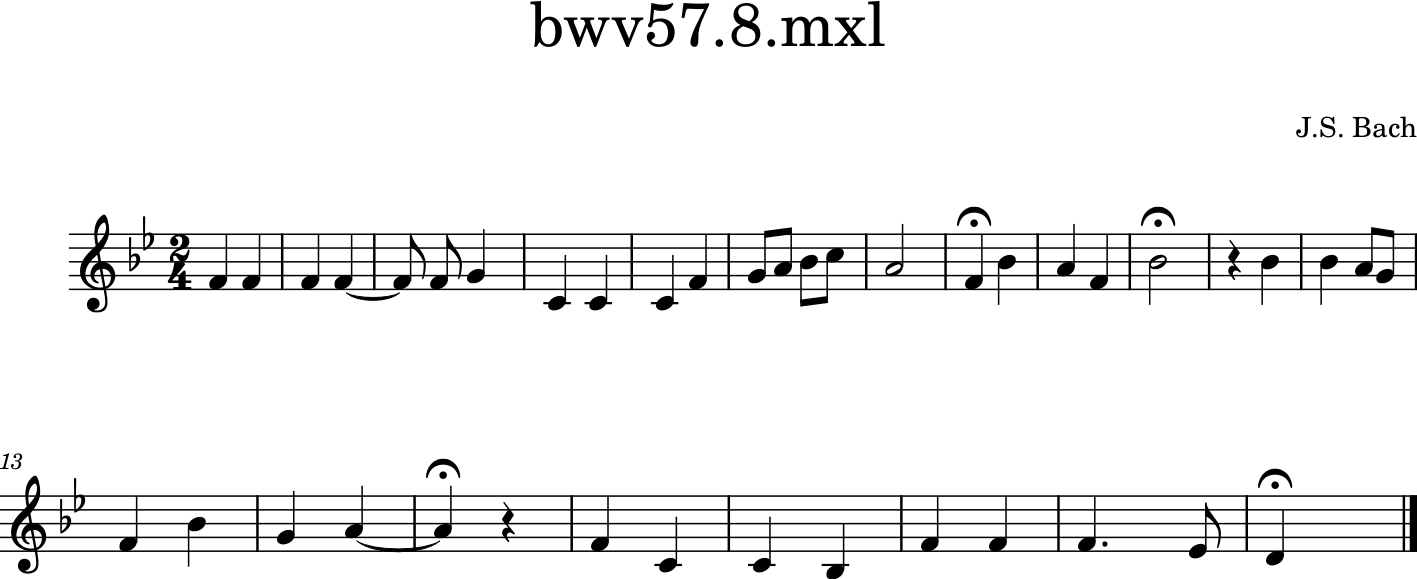

In [36]:
newAltoFixed = newAlto.makeNotation()
newAltoFixed.show()

我们可以继续向这个流中添加多个拍号。首先，使用`Stream.replace()`方法用一个新的拍号替换之前添加的 2/4 。然后，在流中后面一点的位置插入一些额外的拍号。这里使用一个没有小节的扁平流，因此在调用`show()`方法时会自动创建临时小节。

In [37]:
newFlatAlto = newAlto.flatten()
ts = newFlatAlto.getTimeSignatures()[0]
ts

<music21.meter.TimeSignature 2/4>

In [38]:
newFlatAlto.replace(ts, meter.TimeSignature('5/8'))
newFlatAlto.getTimeSignatures()[0]

<music21.meter.TimeSignature 5/8>

现在我们可以再次显示以这个怪异的方式解读的巴赫作品：

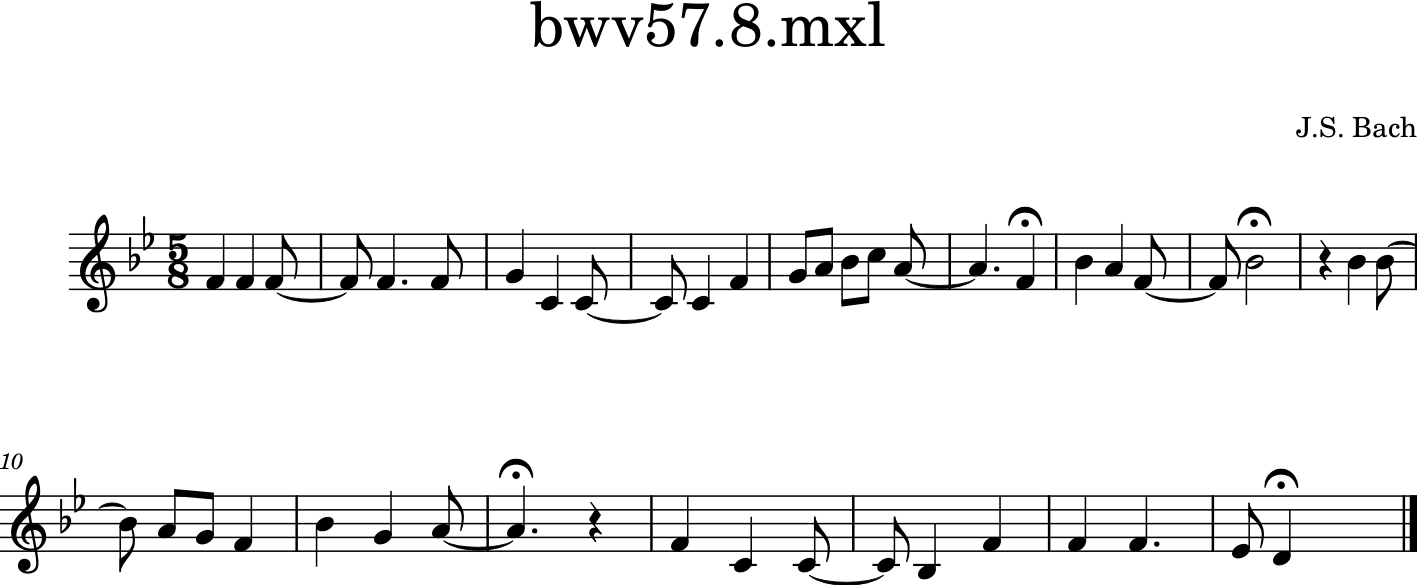

In [39]:
newFlatAlto.makeNotation().show()

快速提示：如果你只想收集音符`Notes`、休止符`Rests`或其他`GeneralNote`的子类，而不介意丢失其他信息（如调号`KeySignature`和乐器`Instrument`对象），那么你可以使用`notesAndRests`属性来实现相同的拍号变化。（否则，最好还是使用`getElementsNotOfClass()`方法）。

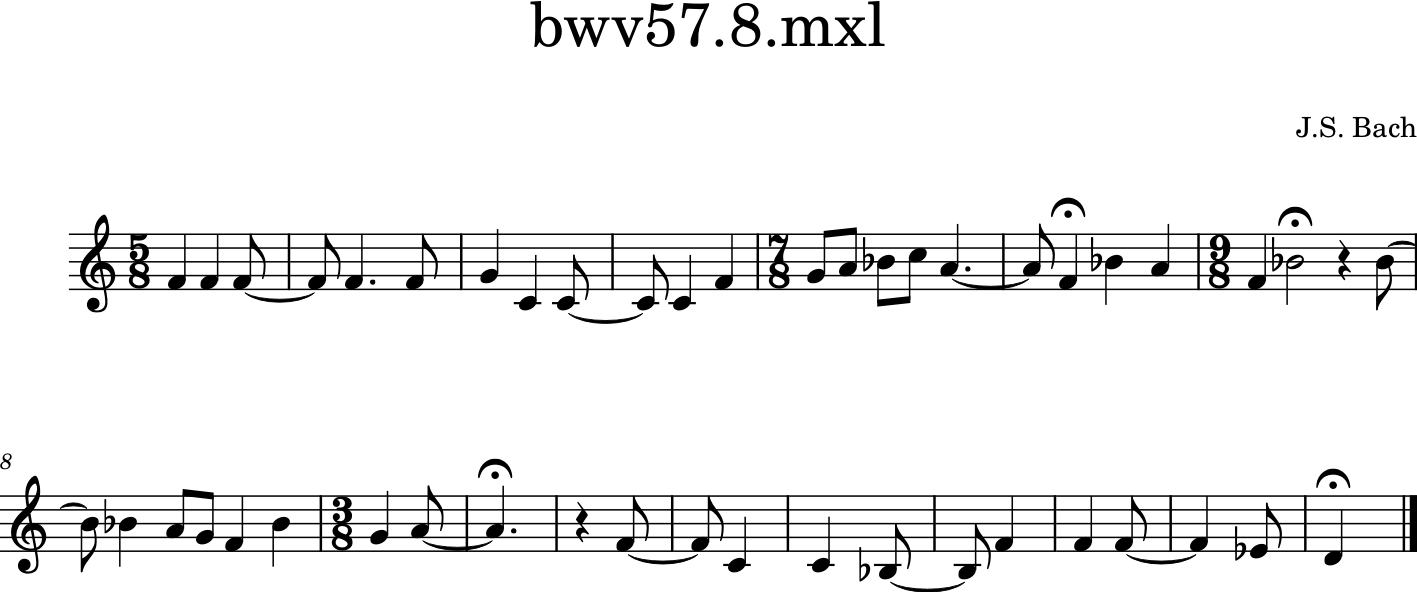

In [40]:
newAlto = alto.flatten().notesAndRests.stream()
newAlto.insert(0.0, meter.TimeSignature('5/8'))
newAlto.insert(10.0, meter.TimeSignature('7/8'))
newAlto.insert(17.0, meter.TimeSignature('9/8'))
newAlto.insert(26.0, meter.TimeSignature('3/8'))
newAlto.makeNotation().show()

让我们看看将拍号放在每个音轨的“正确”位置后会是什么样子。首先，使用`.getElementsByClass('TimeSignature')`，或者快捷方式`getTimeSignatures()`获取乐谱中的所有拍号。这是因为我们已经将`Alto`展平为`newAlto`。

In [41]:
tsList = newAlto.getTimeSignatures()

`tsList`是一个音轨对象，所以我们可以用`show`显示：

In [42]:
print(tsList.__class__)
tsList.show('text')

<class 'music21.stream.base.Part'>
{0.0} <music21.meter.TimeSignature 5/8>
{10.0} <music21.meter.TimeSignature 7/8>
{17.0} <music21.meter.TimeSignature 9/8>
{26.0} <music21.meter.TimeSignature 3/8>


现在创建一个新的总谱，并展平原始`myBach`中的所有音轨，获取除了拍号之外的所有内容，运行`.makeNotation()`，并将结果放入新的乐谱中：

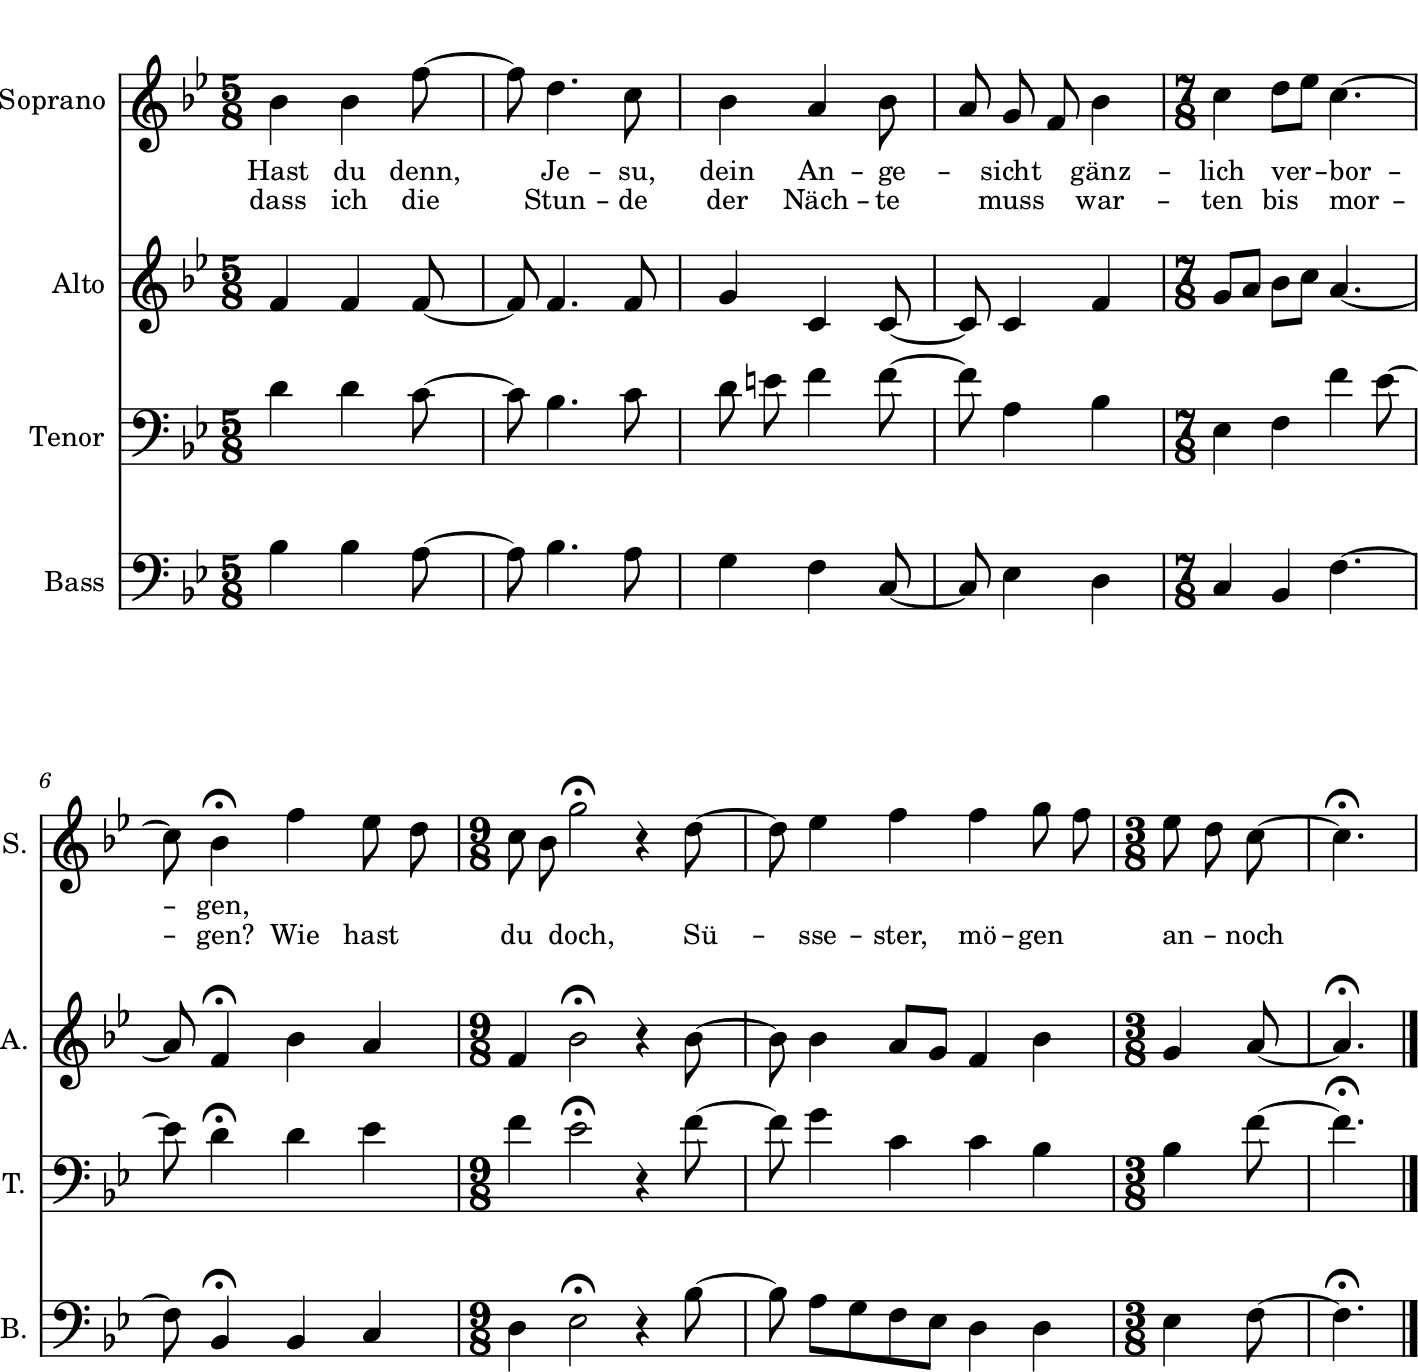

In [43]:
newScore = stream.Score()

for part in myBach.parts:
    flatPart = part.flatten()
    noTSPart = flatPart.getElementsNotOfClass('TimeSignature').stream()
    for ts in tsList:
        noTSPart.insert(ts.offset, ts)
    noTSPart.makeNotation(inPlace=True)
    newScore.insert(0, noTSPart)

newScore.measures(1, 10).show()

## 在乐谱中处理拍位
如果一个音符在一个小节中，并且该小节或之前的某个小节有拍号，那么可以获得该音符的拍位，也就是以拍为单位的，该音符在小节中的位置。

`Note.beat`属性将返回拍位的浮点数表示。`Note.beatStr`属性返回字符串表示，并尽可能表示为分数。

让我们看看我们如何在巴赫的乐谱中使用拍位。我们可以使用`beatStr`为`Soprano`音轨中的每个音符获取一个格式化的节拍度量：

In [44]:
sopr = myBach.parts['Soprano'].measures(1,2)

for n in sopr.recurse().notes:
    print(n, n.beatStr)

<music21.note.Note B-> 1
<music21.note.Note B-> 2
<music21.note.Note F> 3
<music21.note.Note D> 1
<music21.note.Note C> 2 1/2
<music21.note.Note B-> 3


我们将`beatStr`作为每个音符的歌词，以在五线谱中查看：

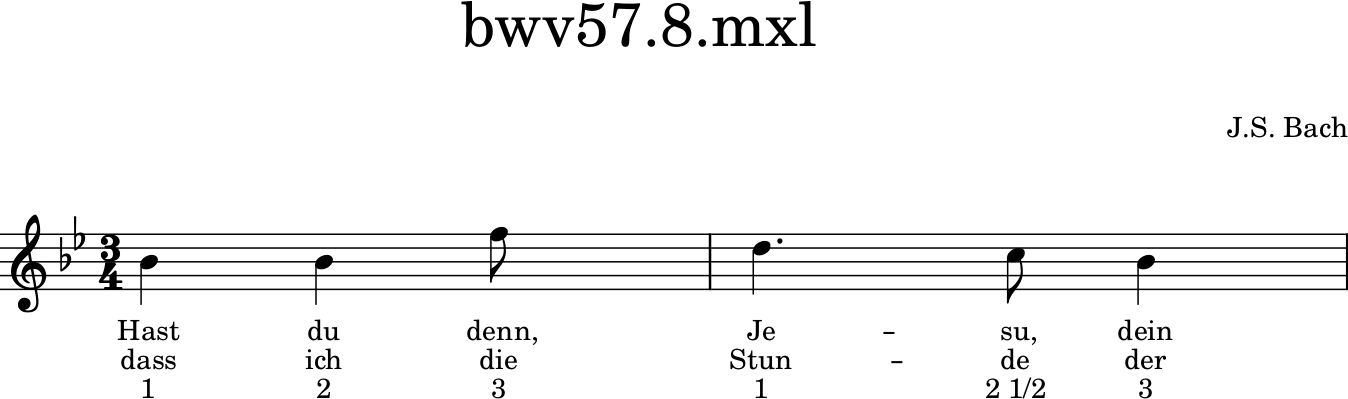

In [45]:
for n in sopr.recurse().notes:
    n.addLyric(n.beatStr)

sopr.show()

如果我们更改乐谱中某个声部的拍号，拍位将会反映这一变化。例如，如果将同一首歌的`bass`音轨重新编排为 6/8 拍， music21 将会给出新的、切分的拍位。

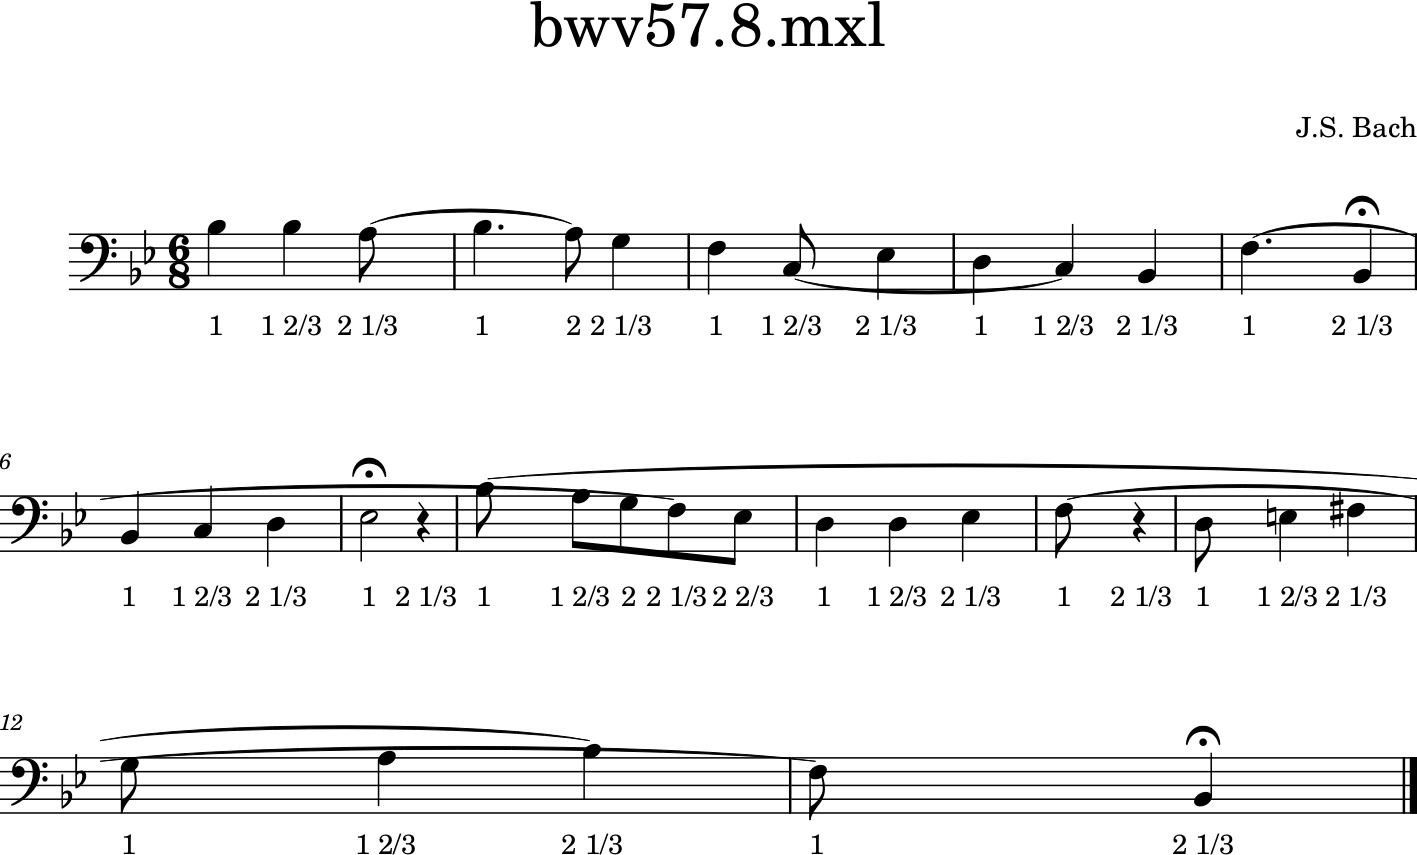

In [46]:
bass = myBach.getElementById('Bass')
newBass = bass.flatten().getElementsNotOfClass(meter.TimeSignature).stream()
newMeasures = newBass.makeMeasures(meter.TimeSignature('6/8'))
newMeasures.makeTies(inPlace=True)
for n in newMeasures.recurse().notesAndRests:
    n.addLyric(n.beatStr)
newMeasures.show()

每个音符还有一个`beatStrength`（拍强），显示 music21 认为它的音节重音程度，1.0 表示最强拍，0 表示最弱拍。

In [47]:
for n in sopr.recurse().notes:
    print(n, n.beatStrength)

<music21.note.Note B-> 1.0
<music21.note.Note B-> 0.5
<music21.note.Note F> 0.5
<music21.note.Note D> 1.0
<music21.note.Note C> 0.25
<music21.note.Note B-> 0.5


本章为读者介绍了关于拍号和节拍的各种操作的。我们将在用户指南的后续章节中再次回到这个主题，展示如何通过节拍和 TimeSignature 对象控制连音、重音和其他元素。[用户指南，第15章：调性与调号](15.ipynb)将介绍`KeySignature`和`Key`对象。